In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv('heights_weights.csv')
df.head()

,Height_cm,weights_Kg
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height_cm')

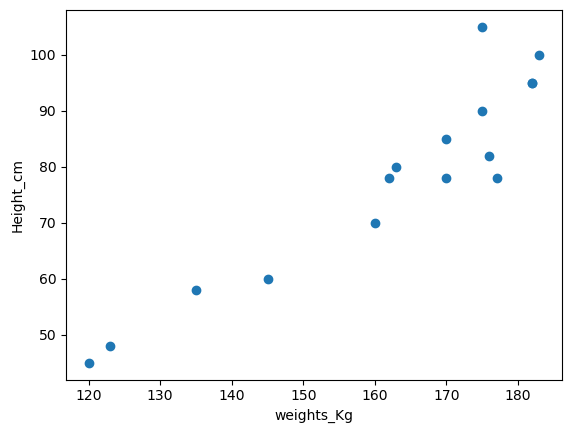

In [4]:
#scatter plot
plt.scatter(df['weights_Kg'], df['Height_cm'])
plt.xlabel('weights_Kg')
plt.ylabel('Height_cm')

In [5]:
#finding correlation between height and weight
df.corr()

,Height_cm,weights_Kg
Height_cm,1.000000,0.934236
weights_Kg,0.934236,1.000000


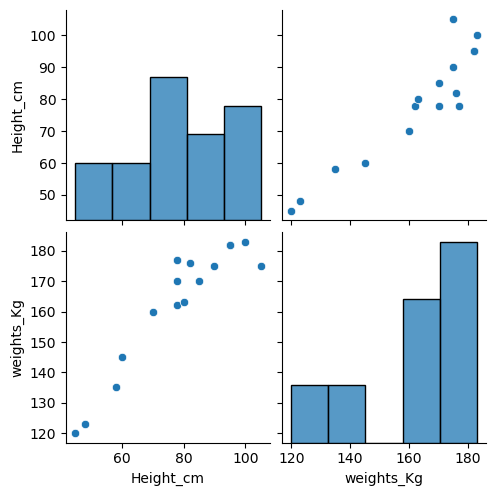

In [6]:
#seaborn Visuliztaion
import seaborn as sns
sns.pairplot(df)

In [9]:
#independent and dependent features
X = df[['weights_Kg']]  # Independent features as 2D Array/ DataFrame
Y = df['Height_cm']  #Dependent features only havee 1D array
np.array(X).shape
np.array(Y).shape



(16,)

In [10]:
#Train Test Sprit
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test


array([[-2.7842398 ],
       [-1.90654599],
       [-0.32669714],
       [ 0.14140622]])

In [11]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs = -1)
regression.fit(X_train, Y_train)
print("Coefficient or slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)



Coefficient or slope :  [14.3734551]
Intercept :  81.75000000000001


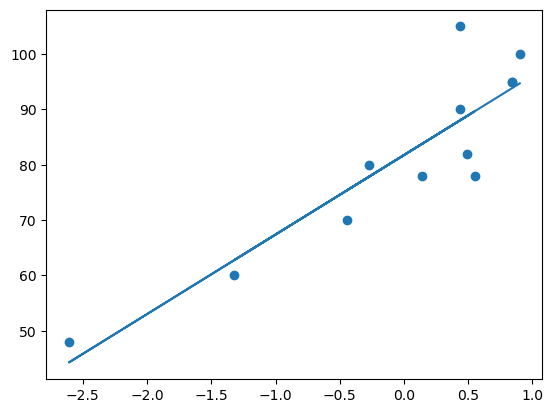

In [9]:
#Plot Training Data Plot for best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction of test data
predicted height output = intercept + coef_(weights)
y_pred_test = 81.25 + 14.37 (X_test)

In [13]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [20]:
#Perfomaance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


6.603321501262825
2.2715173922347187
2.569692880727739


R Square
formula 
R ^ 2 = 1 - SSR/SST
R^2 = coefficiant of determination SSR = sum of square of residuals SST = total sum of squares



Adjuste R2 = 1 - [(1-R2)*(n-1) / (n-k-1)]

In [21]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred)
print(score)
#display adjusted R squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)



0.9738223131763615


0.9607334697645422

In [16]:
#OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

predictions = model.predict(X_test)
print(predictions)


[-40.01914572 -27.4036532   -4.69576666   2.03249602]


In [17]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Height_cm   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.058
Method:                 Least Squares   F-statistic:                             0.3375
Date:                Fri, 13 Feb 2026   Prob (F-statistic):                       0.573
Time:                        12:21:34   Log-Likelihood:                         -69.916
No. Observations:                  12   AIC:                                      141.8
Df Residuals:                      11   BIC:                                      142.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
## Predictions for new Data
regression.predict(scaler.transform([[120]]))

c:\Users\User\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([41.73085428])